
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/AnduScheusan/Documents/Coding/Artificial Intelligence/DeepLearning/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/AnduScheusan/Documents/Coding/Artificial Intelligence/DeepLearning/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/AnduScheusan/Documents/Coding/A

AssertionError: Torch not compiled with CUDA enabled

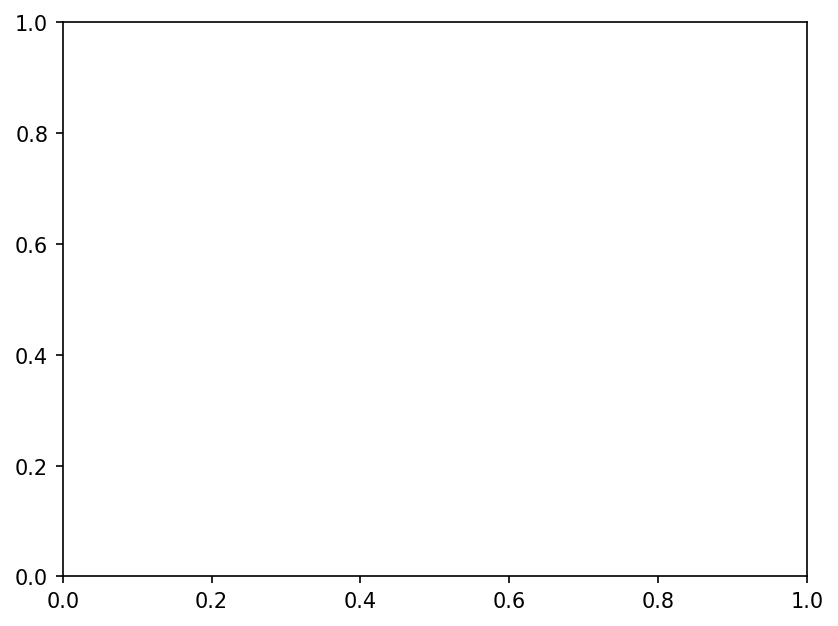

In [1]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
import torch
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()
fig, ax = plt.subplots()

class Model(torch.nn.Module):
    def __init__(self, n_neurons):
        super().__init__()
        self.l1 = torch.nn.Linear(1, n_neurons)
        self.relu = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x
model = Model(3).cuda()

x = np.linspace(-5, 5, 50)
tensor_x = torch.tensor(x).unsqueeze(1).float().cuda()
y = np.sin(x)
tensor_y = torch.tensor(y).unsqueeze(1).float().cuda()

optimizer = torch.optim.SGD(params = model.parameters(), lr = 1e-2)
results = []
n_steps = 7000
divider = 200
i = 0
for step_n in range(n_steps):

    model.zero_grad()

    loss = torch.pow(
        tensor_y[i * 10: (i + 1) * 10] - model(tensor_x[i * 10: (i + 1) * 10]),
        2
    ).mean()

    loss.backward()

    optimizer.step()

    i += 1
    i %= 5
    if step_n % divider == 0:
        results.append(model(tensor_x).detach().cpu().numpy())


def animate(t):
    plt.cla()
    plt.plot(x, y, 'go')
    plt.plot(x, results[t])
    plt.xlim(-5, 5)
    plt.ylim(-2, 2)

matplotlib.animation.FuncAnimation(fig, animate, frames = int(n_steps / divider))

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
import torch
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()
fig, ax = plt.subplots()

class Model(torch.nn.Module):
    def __init__(self, n_neurons):
        super().__init__()
        self.l1 = torch.nn.Linear(1, n_neurons)
        self.relu = torch.nn.ReLU()
        self.l2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.l2(x)
        return x
model = Model(20).cuda()

x = np.linspace(-5, 5, 50)
tensor_x = torch.tensor(x).unsqueeze(1).float().cuda()
y = np.sin(x)
tensor_y = torch.tensor(y).unsqueeze(1).float().cuda()

optimizer = torch.optim.SGD(params = model.parameters(), lr = 1e-2)
results = []
n_steps = 7000
divider = 200
i = 0
for step_n in range(n_steps):
    model.zero_grad()
    loss = torch.pow(
        tensor_y[i * 10: (i + 1) * 10] - model(tensor_x[i * 10: (i + 1) * 10]),
        2
    ).mean()
    loss.backward()
    optimizer.step()
    i += 1
    i %= 5
    if step_n % divider == 0:
        results.append(model(tensor_x).detach().cpu().numpy())


def animate(t):
    plt.cla()
    plt.plot(x, y, 'go')
    plt.plot(x, results[t])
    plt.xlim(-5, 5)
    plt.ylim(-2, 2)

matplotlib.animation.FuncAnimation(fig, animate, frames = int(n_steps / divider))

In [ ]:
!pip install datasets
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import numpy as np
import tiktoken
# https://www.youtube.com/watch?v=zduSFxRajkE <- how tokenizers work by andrej karpathy (stanford, tesla, openai)
import torch
import sys


data = load_dataset("imdb")
train_data = data['train'].data.to_pydict()
val_data = data['test'].data.to_pydict()
tokenizer = tiktoken.encoding_for_model("gpt-2")

class Dataset(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __getitem__(self, sample_n):
        tokens = self._pad_or_trim(
            self.tokenizer.encode(self.data['text'][sample_n])
        )
        label = self.data['label'][sample_n]
        return tokens, label

    def __len__(self):
        return len(self.data['label'])

    def _pad_or_trim(self, tokens):
        output = np.array([self.tokenizer.eot_token] * 512)
        tokens = tokens[:512]
        output[:len(tokens)] = tokens
        return output


train_dataset = Dataset(train_data, tokenizer)
val_dataset = Dataset(val_data, tokenizer)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 16,
    shuffle = True,
    num_workers = 1 # number of parallel threads
)
val_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = 16,
    shuffle = True,
    num_workers = 1 # number of parallel threads
)


class Model(torch.nn.Module):
    def __init__(self, max_token_value):
        super().__init__()
        self.embedding = torch.nn.Embedding(
            max_token_value, 1024, padding_idx=tokenizer.eot_token
        )
        self.classifier = torch.nn.ModuleList([ # modulelist, not simple array
            torch.nn.Linear(1024, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 2)
        ]) # important to do it this way, so that torch can index the params

    def forward(self, x):
        x = self.embedding(x)
        x = x.mean(1)
        for layer in self.classifier:
            x = layer(x)
        return x

model = Model(tokenizer.eot_token + 1).cuda()
# model = torch.load('./latest_model.ckpt') # to resume training from checkpoint


loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr = 1e-3)
# optimizer = torch.load('./latest_optimizer.ckpt') # to resume training from checkpoint
best_val_acc = 0
for epoch_n in range(3):
    model.train()
    training_loss = []
    for tokens, labels in train_dataloader:
        model.zero_grad()

        # forward
        output = model(tokens.cuda())
        loss = loss_fn(output, labels.cuda())
        training_loss.append(loss.detach().cpu().item())
        # backward
        loss.backward()
        optimizer.step()

    model.eval()
    all_predictions = []
    all_labels = []
    for tokens, labels in val_dataloader:
        with torch.no_grad():
            output = model(tokens.cuda())
        predictions = output.argmax(-1)
        all_predictions += predictions.detach().cpu().tolist()
        all_labels += labels.tolist()
    val_accuracy = np.mean(np.array(all_labels) == np.array(all_predictions))

    print(f'Epoch {epoch_n}, training_loss: {np.mean(training_loss)}, val_accuracy: {val_accuracy}')

    torch.save(model, './latest_model.ckpt')
    torch.save(optimizer, './latest_optimizer.ckpt')

    if val_accuracy > best_val_acc:
        torch.save(model, './best_model.ckpt')


# model loading example
model = torch.load('./best_model.ckpt')
model.eval()
all_predictions = []
all_labels = []
for tokens, labels in val_dataloader:
    with torch.no_grad():
        output = model(tokens.cuda())
    predictions = output.argmax(-1)
    all_predictions += predictions.detach().cpu().tolist()
    all_labels += labels.tolist()
val_accuracy = np.mean(np.array(all_labels) == np.array(all_predictions))
print(f'Loaded model accuracy: {val_accuracy}')

Epoch 0, training_loss: 0.380406501592731, val_accuracy: 0.94108
Epoch 1, training_loss: 0.18721357372518502, val_accuracy: 0.97188
Epoch 2, training_loss: 0.10825343186664976, val_accuracy: 0.98136
Loaded model accuracy: 0.98136


In [ ]:
from datasets import load_dataset
import numpy as np
import tiktoken
# https://www.youtube.com/watch?v=zduSFxRajkE <- how tokenizers work by andrej karpathy (stanford, tesla, openai)
import torch
import sys


data = load_dataset("imdb")
train_data = data['train'].data.to_pydict()
val_data = data['test'].data.to_pydict()


STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning <br /><br />Former New Orleans homicide cop Jack Robideaux (Jean Claude Van Damme) is re-assigned to Columbus, a small but violent town in Mexico to help the police there with their efforts to stop a major heroin smuggling operation into their town. The culprits turn out to be ex-military, lead by former commander Benjamin Meyers (Stephen Lord, otherwise known as Jase from East Enders) who is using a special method he learned in Afghanistan to fight off his opponents. But Jack has a more personal reason for taking him down, that draws the two men into an explosive final showdown where only one will walk away alive.<br /><br />After Until Death, Van Damme appeared to be on a high, showing he could make the best straight to video films in the action market. While that was a far more drama oriented film, with The Shepherd he has returned to the high-kicking, no brainer action that first